In [1]:
from typing import List
import torch
from topological_feature_extractor import topo_psf_feature_extract

In [24]:
print("Loading model...")
model = torch.load("./data/extracted_data/data/id-00000019/mnist_lambdatrigger_0.2/leenet5_0.2_poison.pt.1")
print("Loaded model.")

Loading model...
Loaded model.


In [90]:
# Algorithm Configuration
STEP_SIZE:  int = 2 # Stimulation stepsize used in PSF
PATCH_SIZE: int = 2 # Stimulation patch size used in PSF
STIM_LEVEL: int = 4 # Number of stimulation level used in PSF
N_SAMPLE_NEURONS: int = 1.5e3  # Number of neurons for sampling
USE_EXAMPLE: bool =  False     # Whether clean inputs will be given or not
CORR_METRIC: str = 'distcorr'   # Correlation metric to be used
CLASSIFIER: str  = 'xgboost'    # Classifier for the detection , choice = {xgboost, mlp}.
# Experiment Configuration
INPUT_SIZE: List = [1, 28, 28] # Input images' shape (default to be MNIST)
INPUT_RANGE: List = [0, 255]   # Input image range
TRAIN_TEST_SPLIT: float = 0.8  # Ratio of train to test

In [91]:
psf_config = {}
psf_config['step_size'] = STEP_SIZE
psf_config['stim_level'] = STIM_LEVEL
psf_config['patch_size'] = PATCH_SIZE
psf_config['input_shape'] = INPUT_SIZE
psf_config['input_range'] = INPUT_RANGE
psf_config['n_neuron'] = N_SAMPLE_NEURONS
psf_config['corr_method'] = CORR_METRIC

In [92]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
psf_config['device'] = device

In [93]:
print("Extracting topological features...")
fv = topo_psf_feature_extract(model, None, psf_config)
print("Topological features extracted.")
print(fv['persistent_diagram'])

Extracting topological features...
Topological features extracted.
[[array([[0.00000000e+00, 7.74860382e-07],
       [0.00000000e+00, 7.74860382e-07],
       [0.00000000e+00, 7.74860382e-07],
       [0.00000000e+00, 7.74860382e-07],
       [0.00000000e+00, 7.74860382e-07],
       [0.00000000e+00, 7.74860382e-07],
       [0.00000000e+00, 7.74860382e-07],
       [0.00000000e+00, 7.74860382e-07],
       [0.00000000e+00, 7.74860382e-07],
       [0.00000000e+00, 7.74860382e-07],
       [0.00000000e+00, 7.74860382e-07],
       [0.00000000e+00, 7.74860382e-07],
       [0.00000000e+00, 7.74860382e-07],
       [0.00000000e+00, 7.74860382e-07],
       [0.00000000e+00, 7.74860382e-07],
       [0.00000000e+00, 7.74860382e-07],
       [0.00000000e+00, 7.74860382e-07],
       [0.00000000e+00, 7.74860382e-07],
       [0.00000000e+00, 7.74860382e-07],
       [0.00000000e+00, 7.74860382e-07],
       [0.00000000e+00, 7.74860382e-07],
       [0.00000000e+00, 7.74860382e-07],
       [0.00000000e+00, 7.748

In [94]:
import matplotlib.pyplot as plt
import numpy as np

In [95]:
fv['rips']

In [96]:
print(fv['rips'])

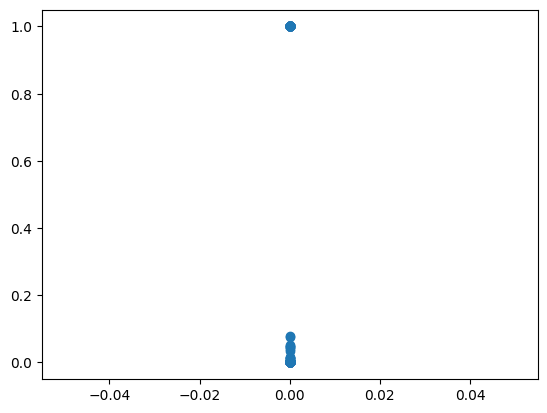

In [97]:
plt.scatter([point[0] for point in fv['persistent_diagram'][0][0]], [point[1] for point in fv['persistent_diagram'][0][0]])

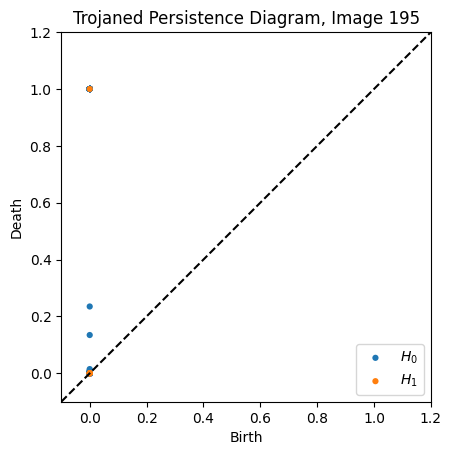

In [99]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Create a figure and axis
fig, ax = plt.subplots()

def update_plot(i):
    #print(i)
    ax.clear()  # Clear the axis
    fv['rips'].plot(fv['persistent_diagram'][i], ax=ax)
    ax.set_title(f"Trojaned Persistence Diagram, Image {i}")
    return ax.get_lines()  # Return the lines on the axis

# Create the animation
ani = animation.FuncAnimation(fig, update_plot, frames=range(196), blit=True)

# Save the animation as a video
Writer = animation.writers['ffmpeg']
writer = Writer(fps=20, metadata=dict(artist='Me'), bitrate=1800)
ani.save('trojaned_persistence_diagrams.mp4', writer=writer)

In [41]:
!pip install tadasets

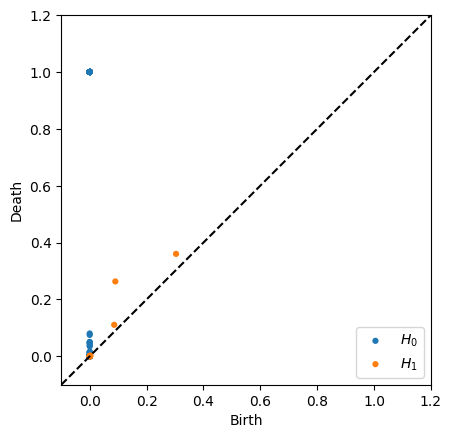

In [55]:
# persistence diagram for trojaned lenet-5 running on example image #0
fv['rips'].plot(fv['persistent_diagram'][0])

In [58]:
print("Loading model...")
#clean_model = torch.load("lenet-5-trained.pth")
clean_model = torch.load("data/extracted_data/data/CLEAN_id-00000019/mnist_lambdatrigger_0.0/leenet5_0.0_poison.pt.1")
print("Loaded model.")

Loading model...
Loaded model.


In [60]:
psf_config_clean = {}
psf_config_clean['step_size'] = STEP_SIZE
psf_config_clean['stim_level'] = STIM_LEVEL
psf_config_clean['patch_size'] = PATCH_SIZE
psf_config_clean['input_shape'] = INPUT_SIZE
psf_config_clean['input_range'] = INPUT_RANGE
psf_config_clean['n_neuron'] = N_SAMPLE_NEURONS
psf_config_clean['corr_method'] = CORR_METRIC

In [61]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
psf_config_clean['device'] = device

In [100]:
print("Extracting topological features...")
fv_clean = topo_psf_feature_extract(clean_model, None, psf_config_clean)
print("Topological features extracted.")
print(fv_clean['persistent_diagram'])

Extracting topological features...
Topological features extracted.
[[array([[0.00000000e+00, 7.74860382e-07],
       [0.00000000e+00, 7.74860382e-07],
       [0.00000000e+00, 7.74860382e-07],
       [0.00000000e+00, 7.74860382e-07],
       [0.00000000e+00, 7.74860382e-07],
       [0.00000000e+00, 7.74860382e-07],
       [0.00000000e+00, 7.74860382e-07],
       [0.00000000e+00, 7.74860382e-07],
       [0.00000000e+00, 7.74860382e-07],
       [0.00000000e+00, 7.74860382e-07],
       [0.00000000e+00, 7.74860382e-07],
       [0.00000000e+00, 7.74860382e-07],
       [0.00000000e+00, 7.74860382e-07],
       [0.00000000e+00, 7.74860382e-07],
       [0.00000000e+00, 7.74860382e-07],
       [0.00000000e+00, 7.74860382e-07],
       [0.00000000e+00, 7.74860382e-07],
       [0.00000000e+00, 7.74860382e-07],
       [0.00000000e+00, 7.74860382e-07],
       [0.00000000e+00, 7.74860382e-07],
       [0.00000000e+00, 7.74860382e-07],
       [0.00000000e+00, 7.74860382e-07],
       [0.00000000e+00, 7.748

In [101]:
from IPython.display import display, clear_output
import time

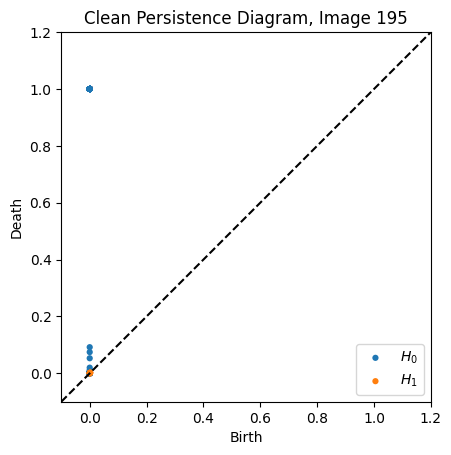

In [102]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Create a figure and axis
fig, ax = plt.subplots()

def update_plot(i):
    #print(i)
    ax.clear()  # Clear the axis
    fv_clean['rips'].plot(fv_clean['persistent_diagram'][i], ax=ax)
    ax.set_title(f"Clean Persistence Diagram, Image {i}")
    return ax.get_lines()  # Return the lines on the axis

# Create the animation
ani = animation.FuncAnimation(fig, update_plot, frames=range(196), blit=True)

# Save the animation as a video
Writer = animation.writers['ffmpeg']
writer = Writer(fps=20, metadata=dict(artist='Me'), bitrate=1800)
ani.save('clean_persistence_diagrams.mp4', writer=writer)

In [73]:
# normalized correlations!
np.max(np.array(fv_clean['correlation_matrix']))

1.0